Step 1 : Data cleaning

In [ ]:
import pandas as pd
import numpy as np 

# Load CSV with correct separator
df = pd.read_csv(
    r"C:\Users\sandy\Desktop\immo-eliza-scraping\properties.csv",  # your file path
    encoding="utf-8"                           # specify encoding
)

# Clean up column names: strip spaces, lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Optional: drop 'equipped_kitchen', 'furnished' and 'garden_area'
df.drop(columns=['equipped_kitchen'], errors='ignore', inplace=True)
df.drop(columns=['furnished'], errors='ignore', inplace=True)
df.drop(columns=['garden_area'], errors='ignore', inplace=True)

# Quick check
display(df.columns.tolist())
display(df.head())



['url',
 'property_id',
 'property_type',
 'locality_name',
 'postal_code',
 'build_year',
 'state',
 'living_area',
 'number_rooms',
 'terrace',
 'facades',
 'garden',
 'swimming_pool',
 'price']

,url,property_id,property_type,locality_name,postal_code,build_year,state,living_area,number_rooms,terrace,facades,garden,swimming_pool,price
0,https://immovlan.be/en/detail/apartment/for-sa...,rbu58257,Apartment,Brussels,1000.0,2004.0,Normal,35.0,1.0,1.0,2.0,0,0,225 000 €
1,https://immovlan.be/en/detail/apartment/for-sa...,rbu36061,Apartment,Turnhout,2300.0,2024.0,New,59.0,1.0,1.0,3.0,0,0,197 000 €
2,https://immovlan.be/en/detail/apartment/for-sa...,vbd48093,Apartment,Berchem-Sainte-Agathe,1082.0,1939.0,Normal,65.0,2.0,1.0,2.0,0,0,169 000 €
3,https://immovlan.be/en/detail/apartment/for-sa...,rbu58259,Apartment,Brussels,1000.0,2013.0,Normal,57.0,1.0,1.0,2.0,0,0,220 000 €
4,https://immovlan.be/en/detail/apartment/for-sa...,rbu36063,Apartment,Turnhout,2300.0,2024.0,New,66.0,1.0,1.0,3.0,0,0,225 000 €


In [ ]:
# Fill string columns with 'None'

df[df.select_dtypes(include='object').columns] = (
    df.select_dtypes(include='object').fillna('None'))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


df.describe(include='all')


,url,property_id,property_type,locality_name,postal_code,build_year,state,living_area,number_rooms,terrace,facades,garden,swimming_pool,price
count,7222,7222,7222,7222,7032.000000,4226.000000,7222,6019.000000,6287.000000,6145.000000,4732.000000,7222.000000,7222.000000,7222
unique,7222,7222,16,1011,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,1748
top,https://immovlan.be/en/detail/apartment/for-sa...,rbu58257,Residence,Liege,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None
freq,1,1,3272,195,NaN,NaN,2465,NaN,NaN,NaN,NaN,NaN,NaN,197
mean,NaN,NaN,NaN,NaN,4993.977389,1975.683389,NaN,161.905632,2.934150,0.766640,2.771767,0.518970,0.024370,NaN
std,NaN,NaN,NaN,NaN,2801.526581,45.297336,NaN,127.410805,1.660433,0.423004,0.829532,0.499675,0.154206,NaN
min,NaN,NaN,NaN,NaN,1000.000000,1500.000000,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,2640.000000,1954.000000,NaN,93.000000,2.000000,1.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,4430.000000,1977.000000,NaN,136.000000,3.000000,1.000000,3.000000,1.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,8301.000000,2016.750000,NaN,190.000000,4.000000,1.000000,4.000000,1.000000,0.000000,NaN


Step 2 was performed by another team member

Step 3 : Visualisation of the data (scatter plot, box plot, percentages)

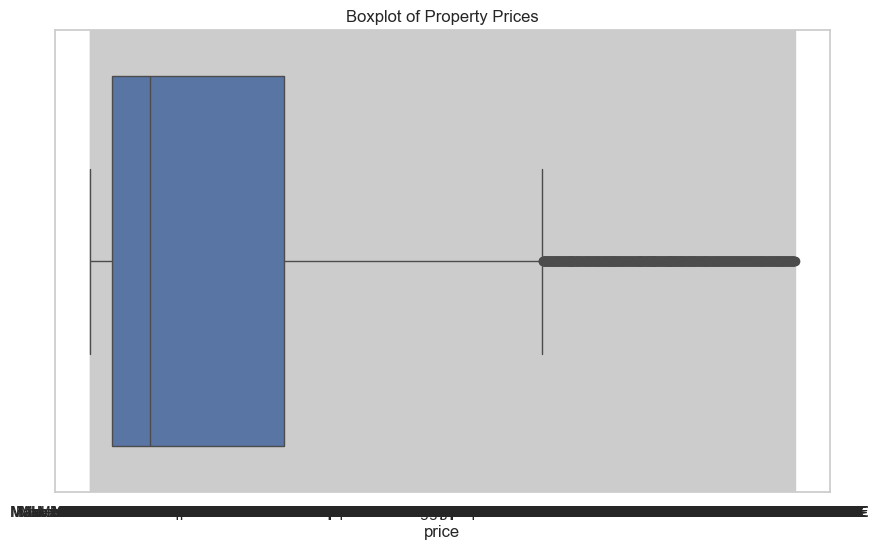

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Property Prices')
plt.show()



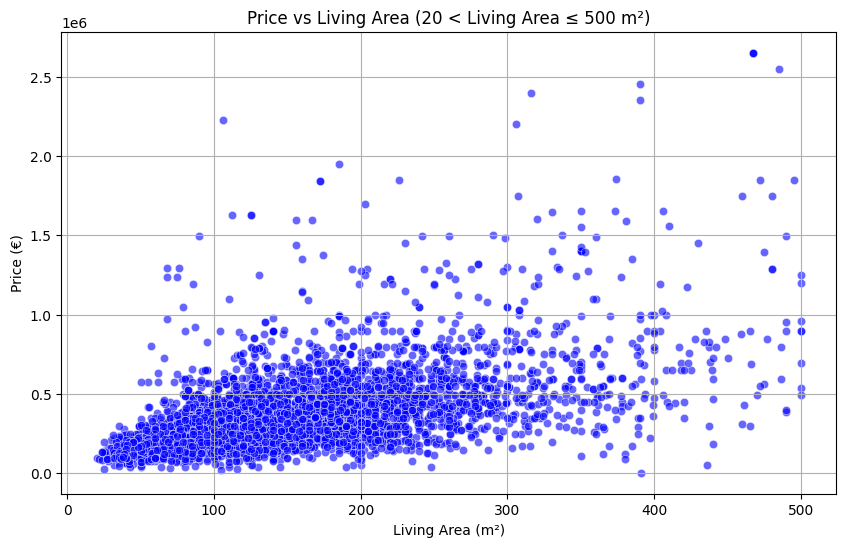

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
df = pd.read_csv(
    r"C:\Users\sandy\Desktop\immo-eliza-scraping\properties.csv",
    encoding="utf-8"
)

# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Clean price column
# --- Clean price column safely ---

# Convert to string and remove non-digit characters
df['price'] = df['price'].astype(str).str.replace(r'[^0-9]', '', regex=True)

# Replace empty strings with NaN
df['price'] = df['price'].replace('', pd.NA)

# Convert to float (errors='coerce' turns bad values into NaN instead of raising errors)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing price
df = df.dropna(subset=['price'])



df = df.dropna(subset=['price'])

# Drop optional columns
df.drop(columns=['equipped_kitchen', 'furnished', 'garden_area'], errors='ignore', inplace=True)

# Filter 20 < living area ≤ 500 m²
df = df[(df['living_area'] >= 20) & (df['living_area'] <= 500)]


# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='living_area', y='price', data=df, color='blue', alpha=0.6)

plt.title('Price vs Living Area (20 < Living Area ≤ 500 m²)')
plt.xlabel('Living Area (m²)')
plt.ylabel('Price (€)')
plt.grid(True)
plt.show()



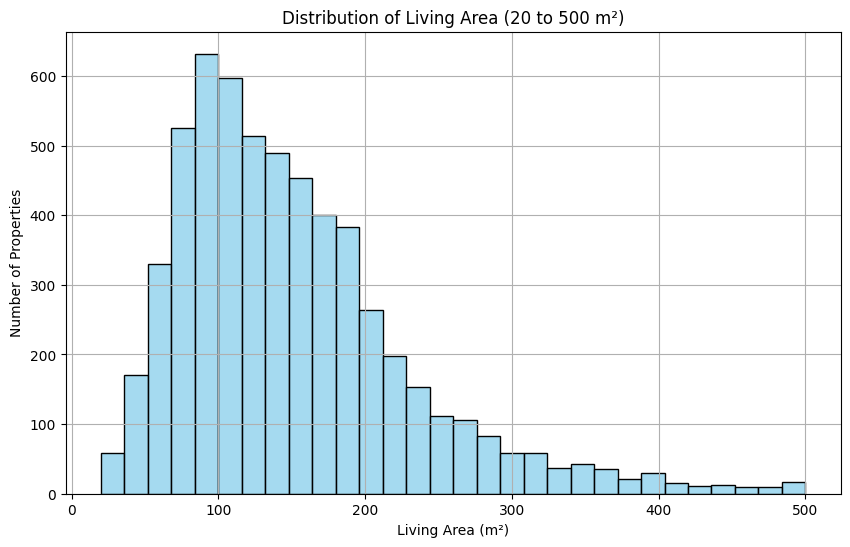

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
df = pd.read_csv(
    r"C:\Users\sandy\Desktop\immo-eliza-scraping\properties.csv",
    encoding="utf-8"
)

# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Clean price column safely
df['price'] = df['price'].astype(str).str.replace(r'[^0-9]', '', regex=True)
df['price'] = df['price'].replace('', pd.NA)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

# Drop optional columns
df.drop(columns=['equipped_kitchen', 'furnished', 'garden_area'], errors='ignore', inplace=True)

# Filter living area between 20 and 500 m²
df = df[(df['living_area'] >= 20) & (df['living_area'] <= 500)]

# Plot histogram of living_area
plt.figure(figsize=(10,6))
sns.histplot(df['living_area'], bins=30, kde=False, color='skyblue')

plt.title('Distribution of Living Area (20 to 500 m²)')
plt.xlabel('Living Area (m²)')
plt.ylabel('Number of Properties')
plt.grid(True)
plt.show()


property_type       province  Apartment  Residence  Total
0                    Antwerp         15         92    107
1              East Flanders         10        100    110
2                    Hainaut          3         28     31


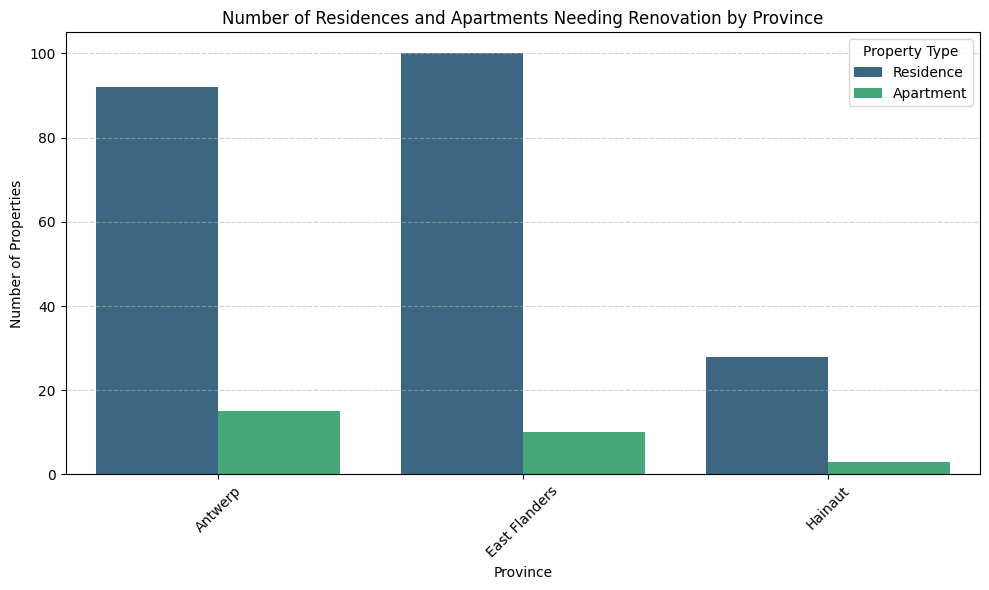

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load CSV
# -------------------------------
df = pd.read_csv(
    r"C:\Users\sandy\Desktop\Hamideh_final_data_cleaned.csv",
    encoding="utf-8"
)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# -------------------------------
# 2. Filter postal codes & property types
# -------------------------------
valid_ranges = (
    df['postal_code'].between(2000, 2990) |
    df['postal_code'].between(6000, 6599) |
    df['postal_code'].between(7000, 7999) |
    df['postal_code'].between(9000, 9999)
)
df_filtered = df[valid_ranges].copy()

df_filtered = df_filtered[df_filtered['property_type'].isin(['Residence', 'Apartment'])].copy()

# -------------------------------
# 3. Convert state and province to string
# -------------------------------
df_filtered['state'] = df_filtered['state'].fillna("Unknown").astype(str)
df_filtered['province'] = df_filtered['province'].fillna("Unknown").astype(str)

# -------------------------------
# 4. Filter renovation properties
# -------------------------------
df_renov = df_filtered[df_filtered['state'].str.contains("renov", case=False, na=False)].copy()

# -------------------------------
# 5. Aggregate counts by province and property type
# -------------------------------
summary = df_renov.groupby(['province', 'property_type']).size().unstack(fill_value=0).reset_index()

# Convert count columns to numeric to avoid TypeError
for col in ['Residence', 'Apartment']:
    if col in summary.columns:
        summary[col] = pd.to_numeric(summary[col], errors='coerce').fillna(0)

summary['Total'] = summary[['Residence','Apartment']].sum(axis=1)

print(summary)

# -------------------------------
# 6. Bar chart per province
# -------------------------------
summary_melted = summary.melt(
    id_vars='province',
    value_vars=['Residence','Apartment'],
    var_name='property_type',
    value_name='count'
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=summary_melted,
    x='province',
    y='count',
    hue='property_type',
    palette='viridis'
)
plt.title("Number of Residences and Apartments Needing Renovation by Province")
plt.xlabel("Province")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Property Type")
plt.tight_layout()
plt.show()


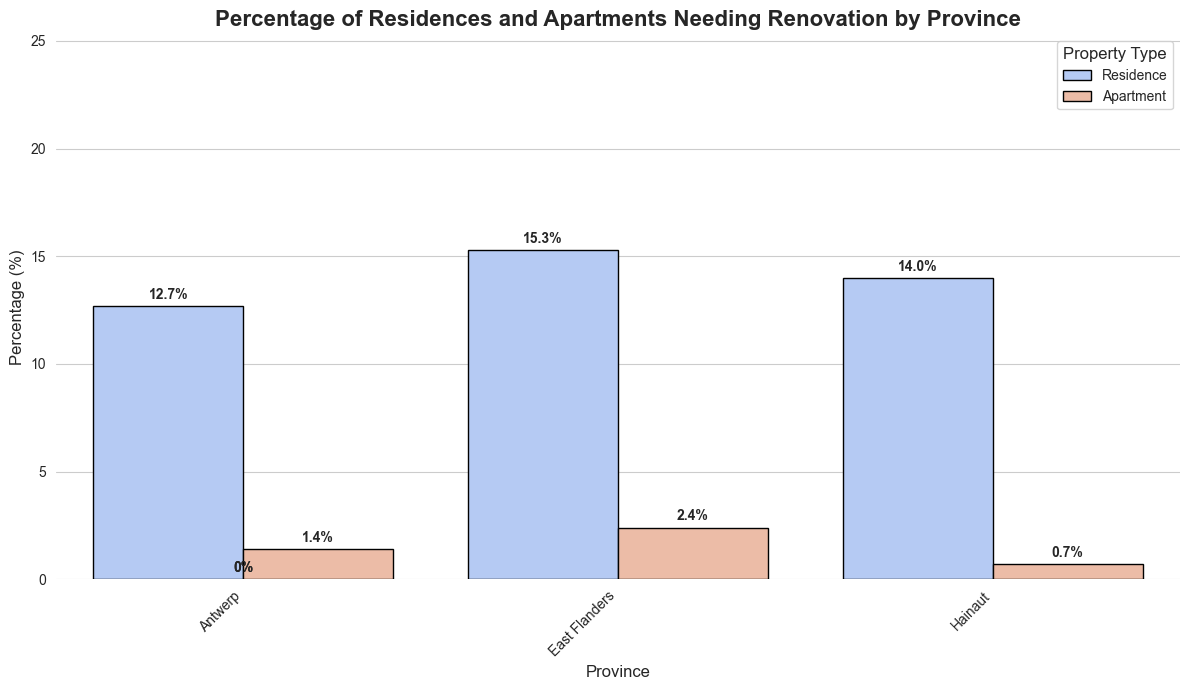

In [28]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load CSV
# -------------------------------
df = pd.read_csv(
    r"C:\Users\sandy\Desktop\Hamideh_final_data_cleaned.csv",
    encoding="utf-8"
)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# -------------------------------
# 2. Filter postal codes & property types
# -------------------------------
valid_ranges = (
    df['postal_code'].between(2000, 2990) |
    df['postal_code'].between(6000, 6599) |
    df['postal_code'].between(7000, 7999) |
    df['postal_code'].between(9000, 9999)
)
df_filtered = df[valid_ranges].copy()
df_filtered = df_filtered[df_filtered['property_type'].isin(['Residence', 'Apartment'])].copy()

# -------------------------------
# 3. Convert state and province to string
# -------------------------------
df_filtered['state'] = df_filtered['state'].fillna("Unknown").astype(str)
df_filtered['province'] = df_filtered['province'].fillna("Unknown").astype(str)

# -------------------------------
# 4. Count total and renovation properties
# -------------------------------
total_props = df_filtered.groupby(['province', 'property_type']).size().unstack(fill_value=0).reset_index()
df_renov = df_filtered[df_filtered['state'].str.contains("renov", case=False, na=False)]
renov_props = df_renov.groupby(['province', 'property_type']).size().unstack(fill_value=0).reset_index()

# Merge and calculate percentages
percentage = total_props.merge(renov_props, on='province', how='left', suffixes=('_total','_renov'))
for prop_type in ['Residence','Apartment']:
    total_col = f"{prop_type}_total"
    renov_col = f"{prop_type}_renov"
    if renov_col not in percentage.columns:
        percentage[renov_col] = 0
    percentage[f"{prop_type}_pct"] = (percentage[renov_col] / percentage[total_col] * 100).round(1)

# Melt for plotting
plot_data = percentage.melt(
    id_vars='province',
    value_vars=['Residence_pct','Apartment_pct'],
    var_name='property_type',
    value_name='percent'
)
plot_data['property_type'] = plot_data['property_type'].str.replace('_pct','')

# -------------------------------
# 5. Fancy Bar Chart
# -------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
palette = sns.color_palette("coolwarm", 2)

bars = sns.barplot(
    data=plot_data,
    x='province',
    y='percent',
    hue='property_type',
    palette=palette,
    edgecolor='black'
)

# Add data labels
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}%', 
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0,3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom',
                  fontsize=10, fontweight='bold')

plt.title("Percentage of Residences and Apartments Needing Renovation by Province", fontsize=16, fontweight='bold')
plt.xlabel("Province", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, plot_data['percent'].max() + 10)  # add some space above bars
plt.legend(title="Property Type", fontsize=10, title_fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


C:\Users\sandy\AppData\Local\Temp\ipykernel_21224\2337346425.py:56: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.barplot(


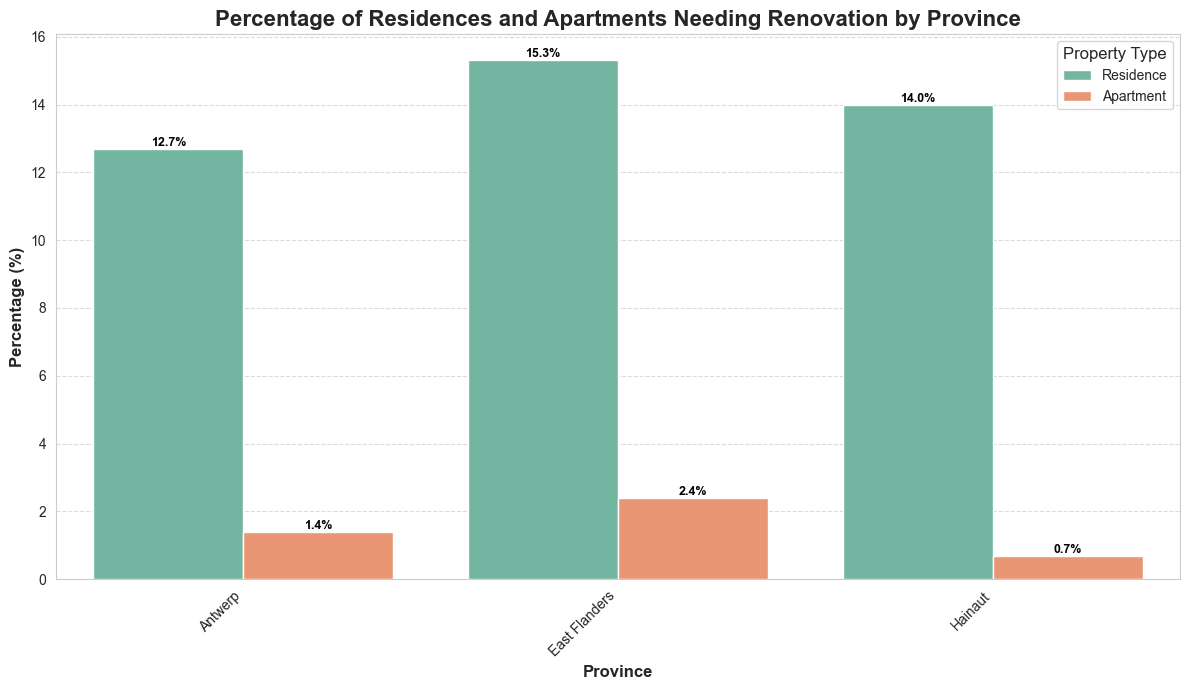

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1-7. Same data processing as before
# -------------------------------
df = pd.read_csv(r"C:\Users\sandy\Desktop\Hamideh_final_data_cleaned.csv", encoding="utf-8")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

valid_ranges = (
    df['postal_code'].between(2000, 2990) |
    df['postal_code'].between(6000, 6599) |
    df['postal_code'].between(7000, 7999) |
    df['postal_code'].between(9000, 9999)
)
df_filtered = df[valid_ranges].copy()
df_filtered = df_filtered[df_filtered['property_type'].isin(['Residence', 'Apartment'])].copy()
df_filtered['state'] = df_filtered['state'].fillna("Unknown").astype(str)
df_filtered['province'] = df_filtered['province'].fillna("Unknown").astype(str)

total_props = df_filtered.groupby(['province', 'property_type']).size().unstack(fill_value=0).reset_index()
for col in ['Residence','Apartment']:
    if col in total_props.columns:
        total_props[col] = pd.to_numeric(total_props[col], errors='coerce').fillna(0)

df_renov = df_filtered[df_filtered['state'].str.contains("renov", case=False, na=False)].copy()
renov_props = df_renov.groupby(['province', 'property_type']).size().unstack(fill_value=0).reset_index()
for col in ['Residence','Apartment']:
    if col in renov_props.columns:
        renov_props[col] = pd.to_numeric(renov_props[col], errors='coerce').fillna(0)

percentage = total_props.merge(renov_props, on='province', how='left', suffixes=('_total','_renov'))
for prop_type in ['Residence','Apartment']:
    total_col = f"{prop_type}_total"
    renov_col = f"{prop_type}_renov"
    if renov_col not in percentage.columns:
        percentage[renov_col] = 0
    percentage[f"{prop_type}_pct"] = (percentage[renov_col] / percentage[total_col] * 100).round(1)

plot_data = percentage.melt(
    id_vars='province',
    value_vars=['Residence_pct','Apartment_pct'],
    var_name='property_type',
    value_name='percent'
)
plot_data['property_type'] = plot_data['property_type'].str.replace('_pct','')

# -------------------------------
# 8. Fancy Bar Chart
# -------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
palette = sns.color_palette("Set2")  # modern, colorful palette

ax = sns.barplot(
    data=plot_data,
    x='province',
    y='percent',
    hue='property_type',
    palette=palette
)

# Add annotations on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Titles and labels
plt.title("Percentage of Residences and Apartments Needing Renovation by Province", fontsize=16, fontweight='bold')
plt.xlabel("Province", fontsize=12, fontweight='bold')
plt.ylabel("Percentage (%)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Legend styling
plt.legend(title="Property Type", fontsize=10, title_fontsize=12, loc='upper right')

# Horizontal gridlines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()



property_type                 province  Apartment  Residence  Total
0                           Luxembourg         13        196    209
1                      Flemish Brabant         23        164    187
2                                Namur         25        155    180
3              Brussels Capital Region        116         62    178
4                                Liège         29        147    176
5                      Walloon Brabant         13        137    150
6                        West Flanders         61         61    122
7                        East Flanders         10        100    110
8                              Antwerp         15         92    107
9                              Limburg         16         79     95
10                             Hainaut          3         28     31


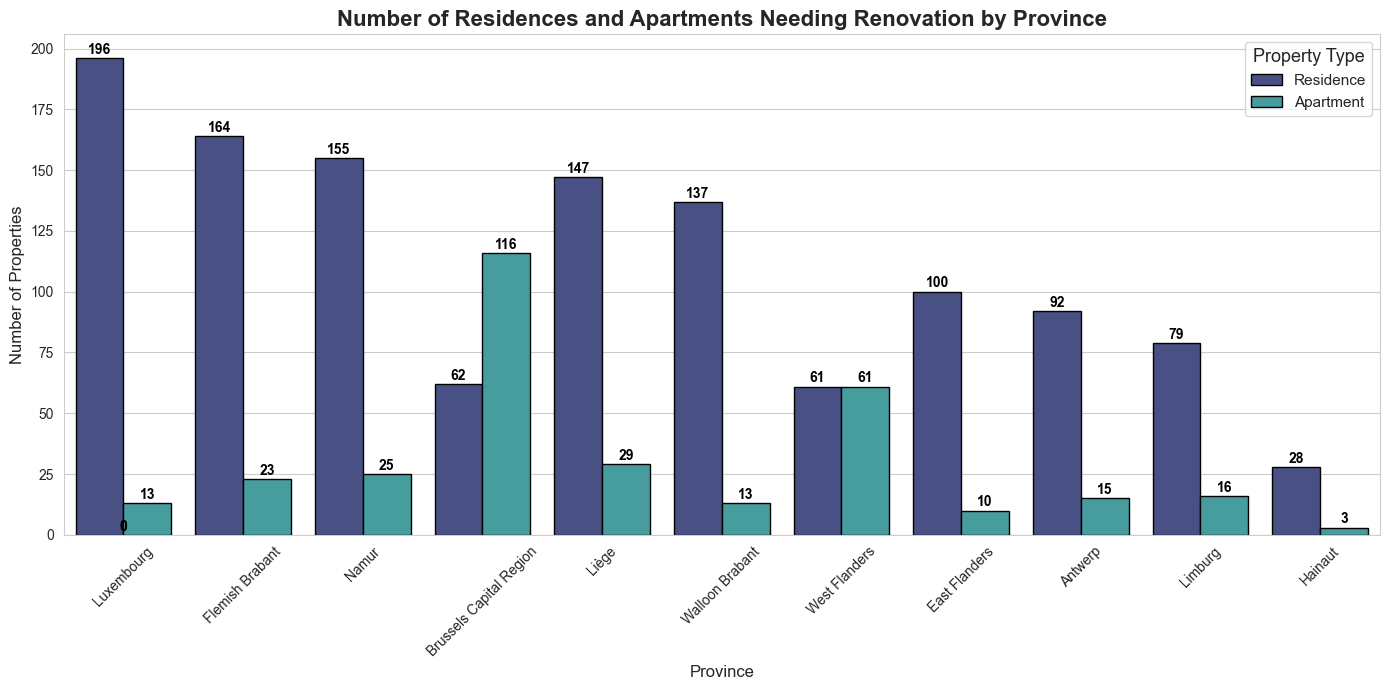

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load CSV
# -------------------------------
df = pd.read_csv(
    r"C:\Users\sandy\Desktop\Hamideh_final_data_cleaned.csv",
    encoding="utf-8"
)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# -------------------------------
# 2. Filter property types
# -------------------------------
df_filtered = df[df['property_type'].isin(['Residence', 'Apartment'])].copy()

# Fill missing province/state
df_filtered['state'] = df_filtered['state'].fillna("Unknown").astype(str)
df_filtered['province'] = df_filtered['province'].fillna("Unknown").astype(str)

# -------------------------------
# 3. Remove unknown provinces
# -------------------------------
df_filtered = df_filtered[df_filtered['province'] != "Unknown"]

# -------------------------------
# 4. Filter renovation properties
# -------------------------------
df_renov = df_filtered[df_filtered['state'].str.contains("renov", case=False, na=False)].copy()

# -------------------------------
# 5. Aggregate counts by province and property type
# -------------------------------
summary = df_renov.groupby(['province', 'property_type']).size().unstack(fill_value=0).reset_index()

# Ensure numeric columns
for col in ['Residence', 'Apartment']:
    if col in summary.columns:
        summary[col] = pd.to_numeric(summary[col], errors='coerce').fillna(0)

# Total per province
summary['Total'] = summary[['Residence','Apartment']].sum(axis=1)

# Sort by total descending
summary = summary.sort_values('Total', ascending=False).reset_index(drop=True)

print(summary)

# -------------------------------
# 6. Melt for plotting
# -------------------------------
plot_data = summary.melt(
    id_vars='province',
    value_vars=['Residence','Apartment'],
    var_name='property_type',
    value_name='count'
)

# -------------------------------
# 7. Fancy vertical bar chart with counts
# -------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

bar_plot = sns.barplot(
    data=plot_data,
    x='province',
    y='count',
    hue='property_type',
    palette='mako',
    edgecolor='black'
)

# Annotate bars with numbers
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{int(height)}',
                      (p.get_x() + p.get_width() / 2, height + 0.5),
                      ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title("Number of Residences and Apartments Needing Renovation by Province", fontsize=16, fontweight='bold')
plt.xlabel("Province", fontsize=12)
plt.ylabel("Number of Properties", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Property Type", title_fontsize='13', fontsize='11', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


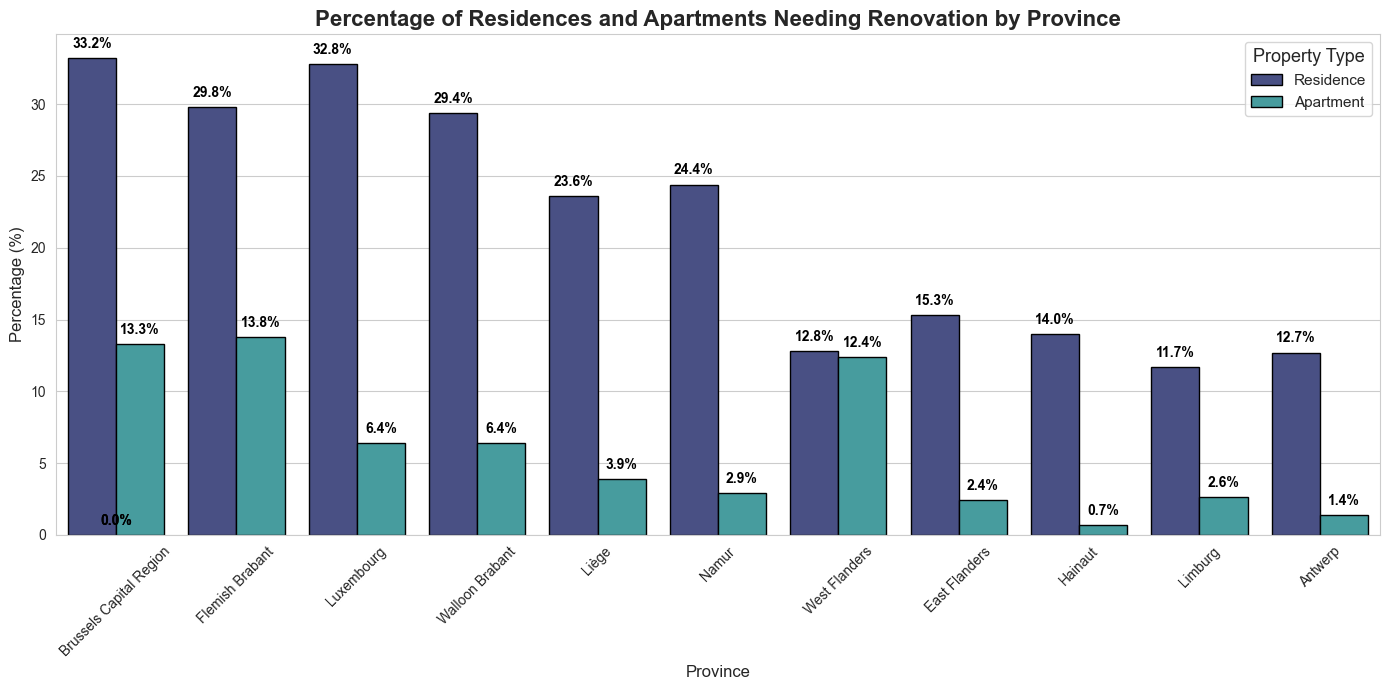

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Load CSV
# -------------------------------
df = pd.read_csv(
    r"C:\Users\sandy\Desktop\Hamideh_final_data_cleaned.csv",
    encoding="utf-8"
)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# -------------------------------
# 2. Filter property types
# -------------------------------
df_filtered = df[df['property_type'].isin(['Residence', 'Apartment'])].copy()

# Fill missing province/state
df_filtered['state'] = df_filtered['state'].fillna("Unknown").astype(str)
df_filtered['province'] = df_filtered['province'].fillna("Unknown").astype(str)

# -------------------------------
# 3. Remove unknown provinces
# -------------------------------
df_filtered = df_filtered[df_filtered['province'] != "Unknown"]

# -------------------------------
# 4. Filter renovation properties
# -------------------------------
df_renov = df_filtered[df_filtered['state'].str.contains("renov", case=False, na=False)].copy()

# -------------------------------
# 5. Aggregate counts by province and property type
# -------------------------------
total_props = df_filtered.groupby(['province', 'property_type']).size().unstack(fill_value=0).reset_index()
renov_props = df_renov.groupby(['province', 'property_type']).size().unstack(fill_value=0).reset_index()

# Ensure numeric columns
for col in ['Residence','Apartment']:
    for df_tmp in [total_props, renov_props]:
        if col in df_tmp.columns:
            df_tmp[col] = pd.to_numeric(df_tmp[col], errors='coerce').fillna(0)

# Merge totals and renovation counts
summary = total_props.merge(renov_props, on='province', how='left', suffixes=('_total', '_renov'))
for col in ['Residence', 'Apartment']:
    renov_col = f"{col}_renov"
    total_col = f"{col}_total"
    if renov_col not in summary.columns:
        summary[renov_col] = 0
    summary[f"{col}_pct"] = (summary[renov_col] / summary[total_col] * 100).round(1)

# -------------------------------
# 5b. Sort provinces by decreasing total renovation percentage
# -------------------------------
summary['total_pct'] = summary['Residence_pct'] + summary['Apartment_pct']
summary = summary.sort_values('total_pct', ascending=False).reset_index(drop=True)

# -------------------------------
# 6. Melt for plotting
# -------------------------------
plot_data = summary.melt(
    id_vars='province',
    value_vars=['Residence_pct','Apartment_pct'],
    var_name='property_type',
    value_name='percent'
)
plot_data['property_type'] = plot_data['property_type'].str.replace('_pct','')

# Preserve province order in plot
plot_data['province'] = pd.Categorical(plot_data['province'], categories=summary['province'], ordered=True)

# -------------------------------
# 7. Fancy vertical bar chart
# -------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

bar_plot = sns.barplot(
    data=plot_data,
    x='province',
    y='percent',
    hue='property_type',
    palette='mako',
    edgecolor='black'
)

# Annotate bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%',
                      (p.get_x() + p.get_width() / 2, height + 0.5),
                      ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title("Percentage of Residences and Apartments Needing Renovation by Province", fontsize=16, fontweight='bold')
plt.xlabel("Province", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Property Type", title_fontsize='13', fontsize='11', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()
